In [1]:
from utils import train_resnet as tr
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data import random_split
import torch
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loaders, datasets, info = tr.get_data_loaders('organamnist', return_datasets=True, im_size=224)

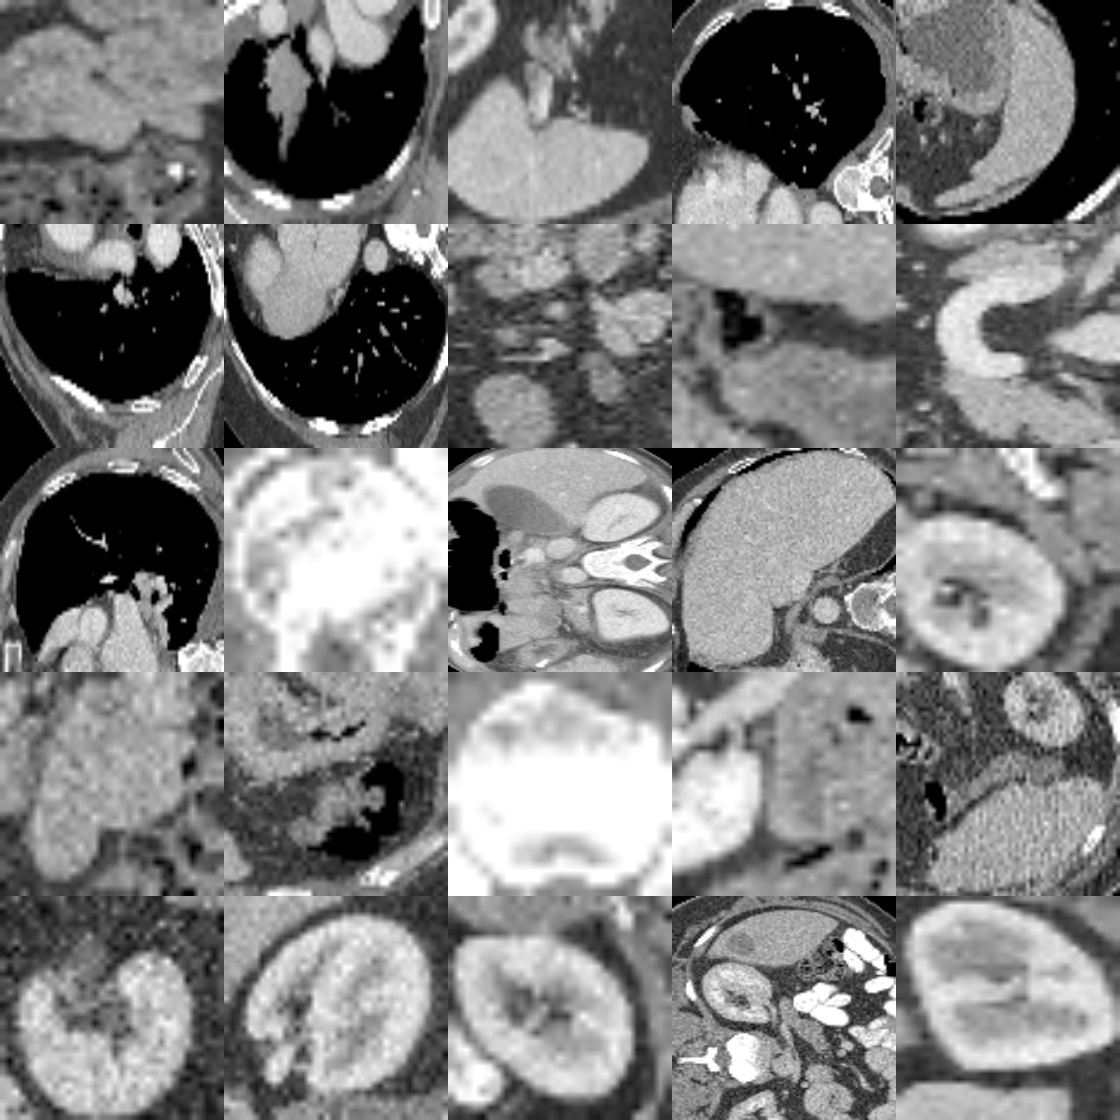

In [3]:
datasets[0].montage(length=5)

In [4]:
datasets[0]

Dataset OrganAMNIST of size 224 (organamnist_224)
    Number of datapoints: 34561
    Root location: /home/psteinmetz/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}
    Number of samples: {'train': 34561, 'val': 6491, 'test': 17778}
    Description: The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1×28×28 to p

In [5]:
# Combine train_dataset and val_dataset
combined_train_dataset = ConcatDataset([datasets[0], datasets[1]])

# Set the random seed for reproducibility
torch.manual_seed(42)

# Calculate the sizes for training and calibration datasets
train_size = int(0.8 * len(combined_train_dataset))
calibration_size = len(combined_train_dataset) - train_size

# Split the combined_train_dataset into training and calibration datasets
train_dataset, calibration_dataset = random_split(combined_train_dataset, [train_size, calibration_size])

# Create DataLoaders for the new training and calibration datasets
calibration_loader = DataLoader(dataset=calibration_dataset, batch_size=128, shuffle=False)

print(f'Training dataset size: {len(train_dataset)}')
print(f'Calibration dataset size: {len(calibration_dataset)}')

Training dataset size: 32841
Calibration dataset size: 8211


In [6]:
# Create stratified K-fold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Get the labels for stratification
labels = [label for _, label in train_dataset]

# Create a list to store the new dataloaders
train_loaders = []
val_loaders = []

for train_index, val_index in skf.split(np.zeros(len(labels)), labels):
    train_subset = torch.utils.data.Subset(train_dataset, train_index)
    val_subset = torch.utils.data.Subset(train_dataset, val_index)
    
    train_loader = DataLoader(dataset=train_subset, shuffle=True, drop_last=True, batch_size=32)
    val_loader = DataLoader(dataset=val_subset, shuffle=True, drop_last=True, batch_size=32)
    
    train_loaders.append(train_loader)
    val_loaders.append(val_loader)

In [7]:
test_loader = DataLoader(dataset=datasets[2], shuffle=False, batch_size=32)

MODEL 0
Train Epoch: 0 [0/26272 (0%)]	Loss: 2.508962
Train Epoch: 0 [320/26272 (1%)]	Loss: 0.913280
Train Epoch: 0 [640/26272 (2%)]	Loss: 0.644837
Train Epoch: 0 [960/26272 (4%)]	Loss: 0.348830
Train Epoch: 0 [1280/26272 (5%)]	Loss: 0.173848
Train Epoch: 0 [1600/26272 (6%)]	Loss: 0.737172
Train Epoch: 0 [1920/26272 (7%)]	Loss: 0.233473
Train Epoch: 0 [2240/26272 (9%)]	Loss: 0.244751
Train Epoch: 0 [2560/26272 (10%)]	Loss: 0.136030
Train Epoch: 0 [2880/26272 (11%)]	Loss: 0.188183
Train Epoch: 0 [3200/26272 (12%)]	Loss: 0.216411
Train Epoch: 0 [3520/26272 (13%)]	Loss: 0.105956
Train Epoch: 0 [3840/26272 (15%)]	Loss: 0.087616
Train Epoch: 0 [4160/26272 (16%)]	Loss: 0.062139
Train Epoch: 0 [4480/26272 (17%)]	Loss: 0.223524
Train Epoch: 0 [4800/26272 (18%)]	Loss: 0.126685
Train Epoch: 0 [5120/26272 (19%)]	Loss: 0.112574
Train Epoch: 0 [5440/26272 (21%)]	Loss: 0.184949
Train Epoch: 0 [5760/26272 (22%)]	Loss: 0.048715
Train Epoch: 0 [6080/26272 (23%)]	Loss: 0.055566
Train Epoch: 0 [6400/26272

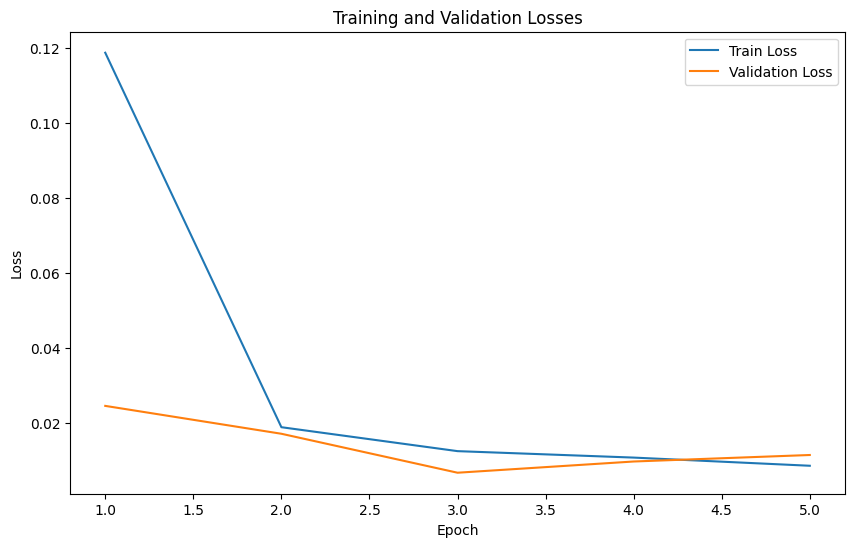

/mnt/data/psteinmetz/archive_notebooks/Documents/medMNIST/utils/train_resnet.py:169: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output)


Accuracy: 0.969
Balanced Accuracy: 0.964
AUC: 0.999


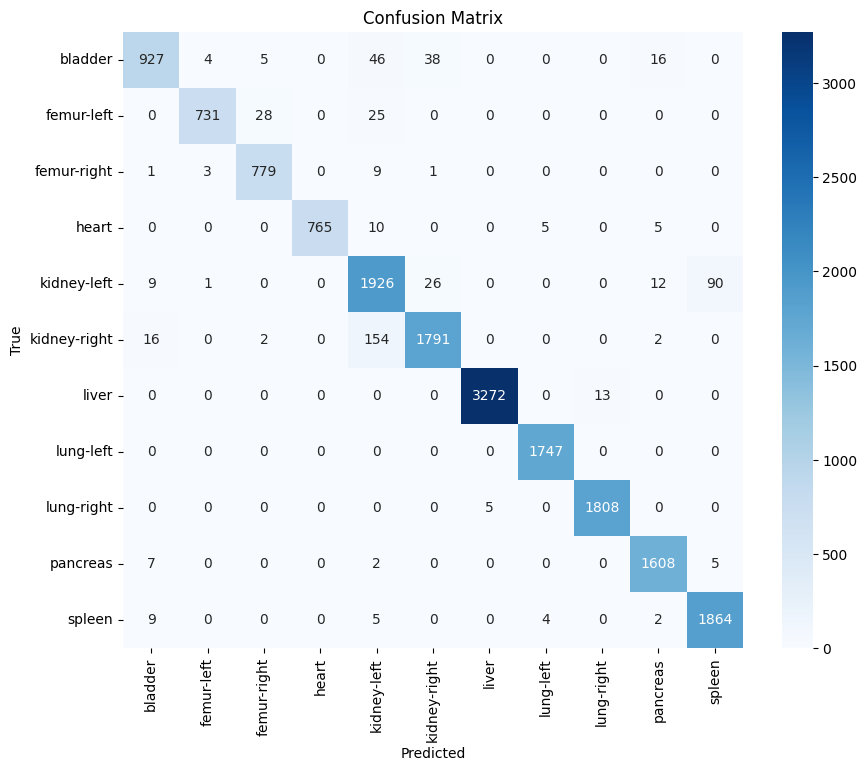

MODEL 1
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.936454
Train Epoch: 0 [320/26273 (1%)]	Loss: 0.822926
Train Epoch: 0 [640/26273 (2%)]	Loss: 0.444951
Train Epoch: 0 [960/26273 (4%)]	Loss: 0.306812
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.345243
Train Epoch: 0 [1600/26273 (6%)]	Loss: 0.422764
Train Epoch: 0 [1920/26273 (7%)]	Loss: 0.402626
Train Epoch: 0 [2240/26273 (9%)]	Loss: 0.124993
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.211750
Train Epoch: 0 [2880/26273 (11%)]	Loss: 0.111675
Train Epoch: 0 [3200/26273 (12%)]	Loss: 0.222380
Train Epoch: 0 [3520/26273 (13%)]	Loss: 0.384481
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.209119
Train Epoch: 0 [4160/26273 (16%)]	Loss: 0.273537
Train Epoch: 0 [4480/26273 (17%)]	Loss: 0.074082
Train Epoch: 0 [4800/26273 (18%)]	Loss: 0.122043
Train Epoch: 0 [5120/26273 (19%)]	Loss: 0.168674
Train Epoch: 0 [5440/26273 (21%)]	Loss: 0.078894
Train Epoch: 0 [5760/26273 (22%)]	Loss: 0.108134
Train Epoch: 0 [6080/26273 (23%)]	Loss: 0.156342
Train Epoch: 0 [6400/26273

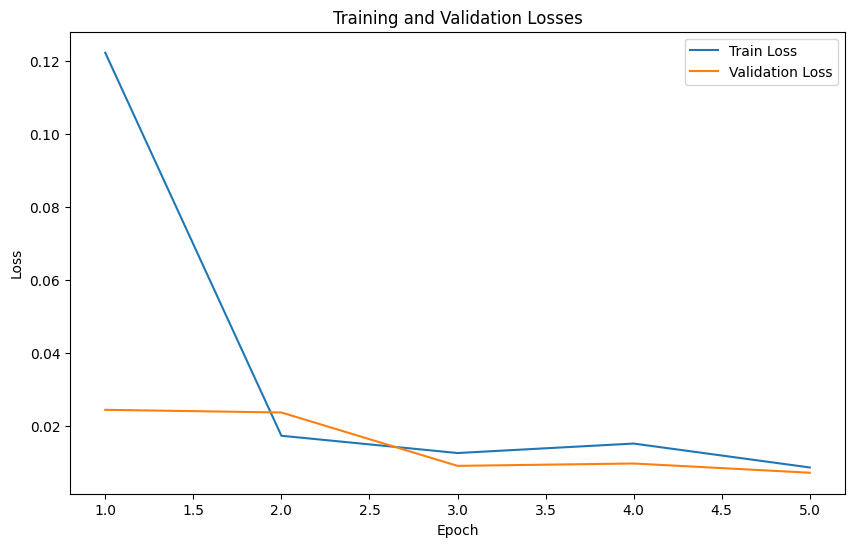

/mnt/data/psteinmetz/archive_notebooks/Documents/medMNIST/utils/train_resnet.py:169: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output)


Accuracy: 0.972
Balanced Accuracy: 0.966
AUC: 0.999


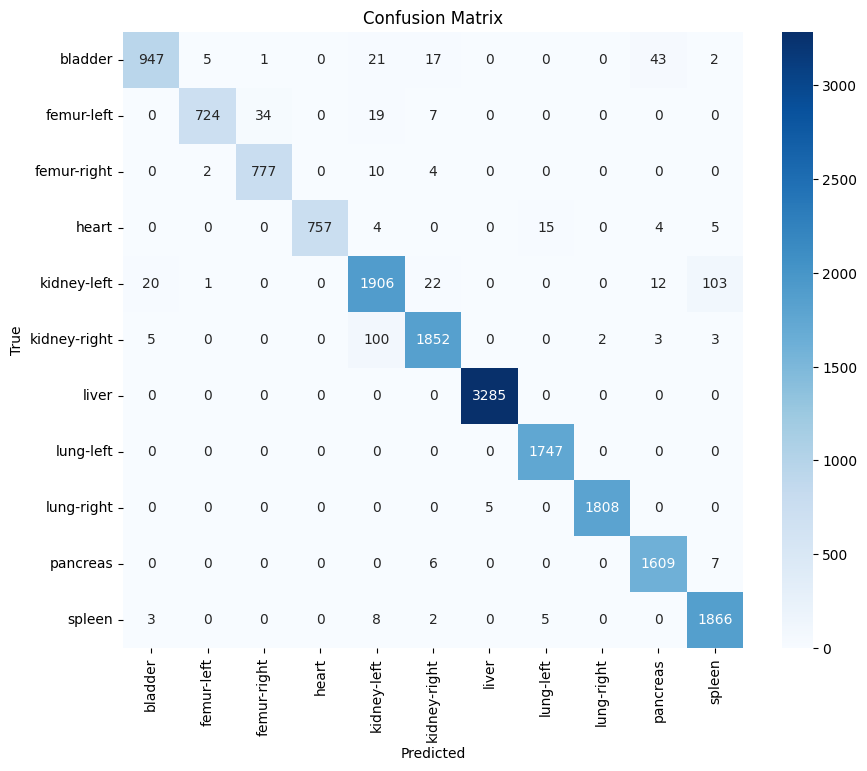

MODEL 2
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.491342
Train Epoch: 0 [320/26273 (1%)]	Loss: 0.911297
Train Epoch: 0 [640/26273 (2%)]	Loss: 0.412228
Train Epoch: 0 [960/26273 (4%)]	Loss: 0.330791
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.312084
Train Epoch: 0 [1600/26273 (6%)]	Loss: 0.303761
Train Epoch: 0 [1920/26273 (7%)]	Loss: 0.204732
Train Epoch: 0 [2240/26273 (9%)]	Loss: 0.283753
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.203190
Train Epoch: 0 [2880/26273 (11%)]	Loss: 0.039620
Train Epoch: 0 [3200/26273 (12%)]	Loss: 0.223129
Train Epoch: 0 [3520/26273 (13%)]	Loss: 0.458433
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.228247
Train Epoch: 0 [4160/26273 (16%)]	Loss: 0.174831
Train Epoch: 0 [4480/26273 (17%)]	Loss: 0.177729
Train Epoch: 0 [4800/26273 (18%)]	Loss: 0.177729
Train Epoch: 0 [5120/26273 (19%)]	Loss: 0.075517
Train Epoch: 0 [5440/26273 (21%)]	Loss: 0.067864
Train Epoch: 0 [5760/26273 (22%)]	Loss: 0.136354
Train Epoch: 0 [6080/26273 (23%)]	Loss: 0.135475
Train Epoch: 0 [6400/26273

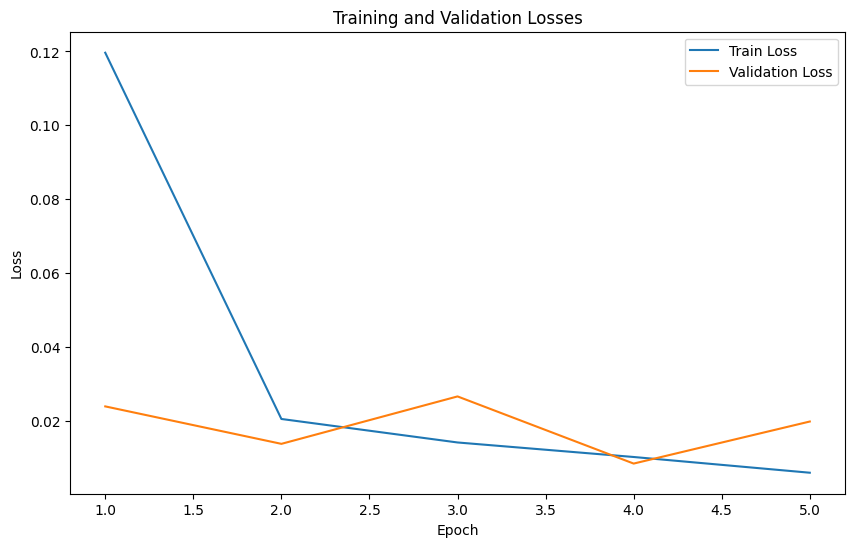

/mnt/data/psteinmetz/archive_notebooks/Documents/medMNIST/utils/train_resnet.py:169: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output)


Accuracy: 0.961
Balanced Accuracy: 0.953
AUC: 0.999


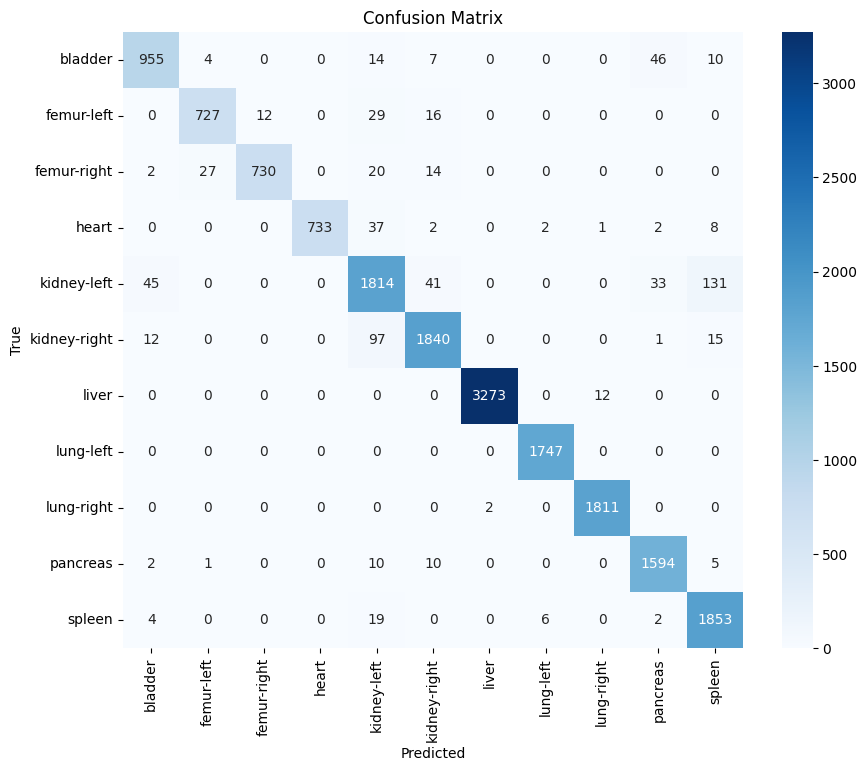

MODEL 3
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.525692
Train Epoch: 0 [320/26273 (1%)]	Loss: 0.980732
Train Epoch: 0 [640/26273 (2%)]	Loss: 0.507825
Train Epoch: 0 [960/26273 (4%)]	Loss: 0.467828
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.461395
Train Epoch: 0 [1600/26273 (6%)]	Loss: 0.280007
Train Epoch: 0 [1920/26273 (7%)]	Loss: 0.350822
Train Epoch: 0 [2240/26273 (9%)]	Loss: 0.384616
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.515557
Train Epoch: 0 [2880/26273 (11%)]	Loss: 0.135428
Train Epoch: 0 [3200/26273 (12%)]	Loss: 0.183897
Train Epoch: 0 [3520/26273 (13%)]	Loss: 0.234786
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.115259
Train Epoch: 0 [4160/26273 (16%)]	Loss: 0.052774
Train Epoch: 0 [4480/26273 (17%)]	Loss: 0.171343
Train Epoch: 0 [4800/26273 (18%)]	Loss: 0.136076
Train Epoch: 0 [5120/26273 (19%)]	Loss: 0.118108
Train Epoch: 0 [5440/26273 (21%)]	Loss: 0.064739
Train Epoch: 0 [5760/26273 (22%)]	Loss: 0.095855
Train Epoch: 0 [6080/26273 (23%)]	Loss: 0.051814
Train Epoch: 0 [6400/26273

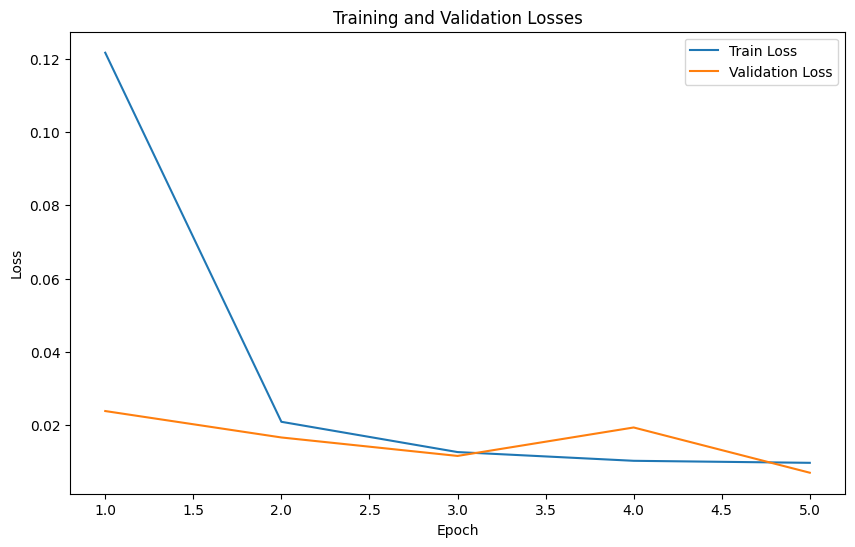

/mnt/data/psteinmetz/archive_notebooks/Documents/medMNIST/utils/train_resnet.py:169: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output)


Accuracy: 0.969
Balanced Accuracy: 0.964
AUC: 0.999


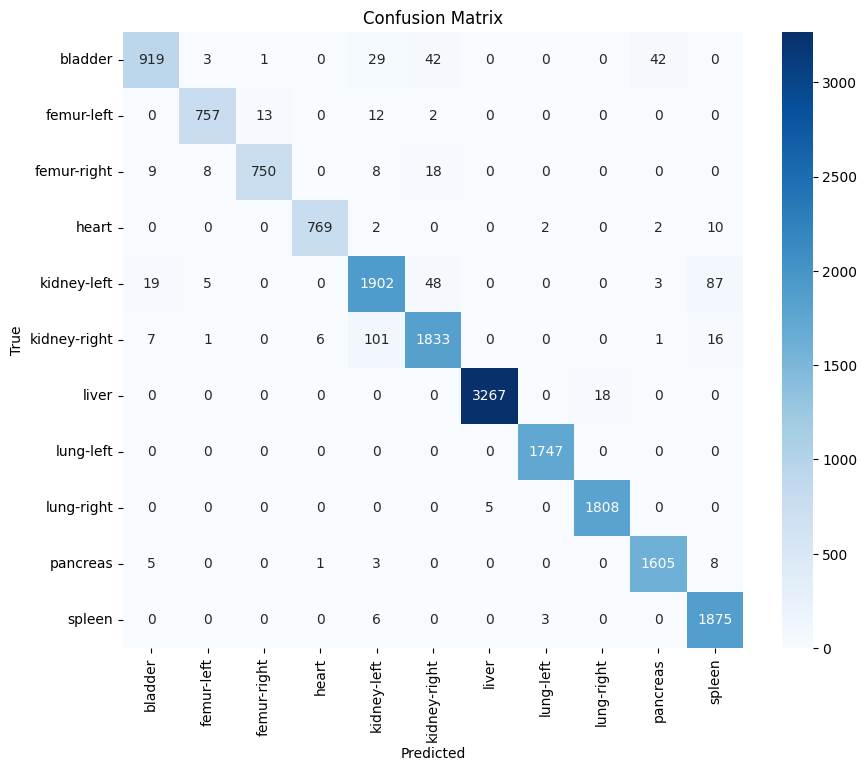

MODEL 4
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.864511
Train Epoch: 0 [320/26273 (1%)]	Loss: 0.811567
Train Epoch: 0 [640/26273 (2%)]	Loss: 0.707173
Train Epoch: 0 [960/26273 (4%)]	Loss: 0.430705
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.346352
Train Epoch: 0 [1600/26273 (6%)]	Loss: 0.256756
Train Epoch: 0 [1920/26273 (7%)]	Loss: 0.498506
Train Epoch: 0 [2240/26273 (9%)]	Loss: 0.192757
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.264257
Train Epoch: 0 [2880/26273 (11%)]	Loss: 0.239042
Train Epoch: 0 [3200/26273 (12%)]	Loss: 0.220598
Train Epoch: 0 [3520/26273 (13%)]	Loss: 0.208165
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.045356
Train Epoch: 0 [4160/26273 (16%)]	Loss: 0.146319
Train Epoch: 0 [4480/26273 (17%)]	Loss: 0.107131
Train Epoch: 0 [4800/26273 (18%)]	Loss: 0.160558
Train Epoch: 0 [5120/26273 (19%)]	Loss: 0.127953
Train Epoch: 0 [5440/26273 (21%)]	Loss: 0.059336
Train Epoch: 0 [5760/26273 (22%)]	Loss: 0.055507
Train Epoch: 0 [6080/26273 (23%)]	Loss: 0.147829
Train Epoch: 0 [6400/26273

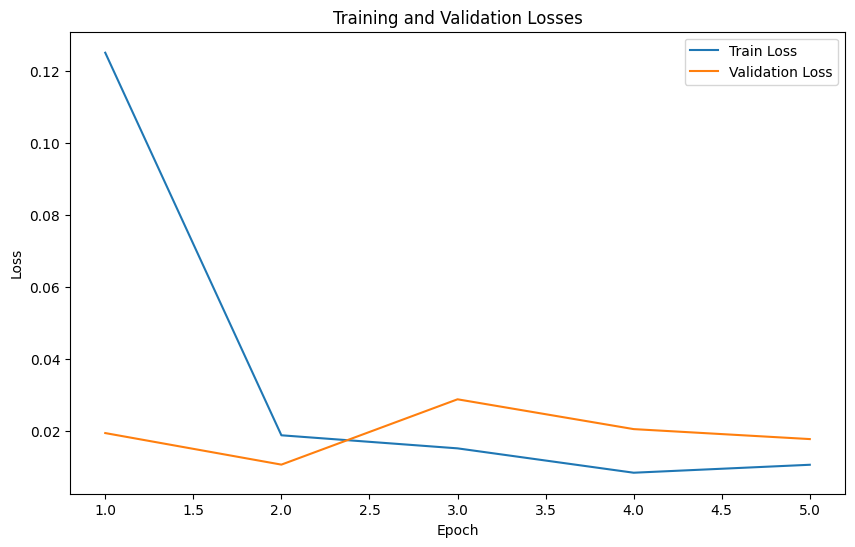

/mnt/data/psteinmetz/archive_notebooks/Documents/medMNIST/utils/train_resnet.py:169: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output)


Accuracy: 0.959
Balanced Accuracy: 0.957
AUC: 0.999


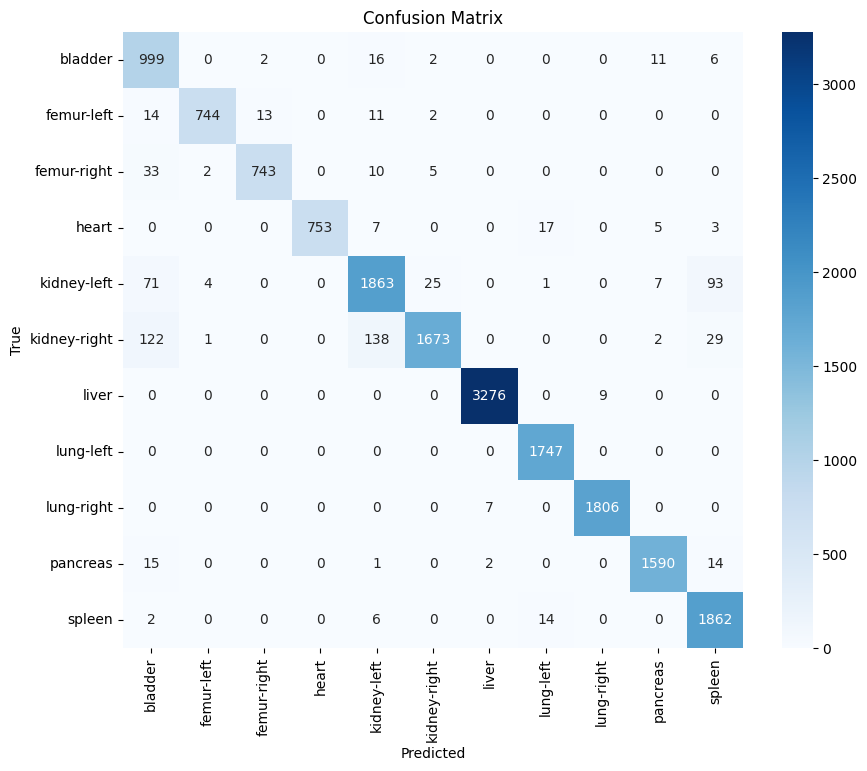

In [8]:
models = []
for i in range(5):
    print('MODEL ' + str(i))
    model = tr.train_resnet18(
        'organamnist',
        train_loader=train_loaders[i],
        val_loader=val_loaders[i],
        test_loader=test_loader,
        num_epochs=5,    
        learning_rate=0.0001,
        random_seed=42  # Set a fixed seed for reproducibility
    )
    models.append(model)

/mnt/data/psteinmetz/archive_notebooks/Documents/medMNIST/utils/train_resnet.py:169: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(output)


Accuracy: 0.977
Balanced Accuracy: 0.973
AUC: 0.999


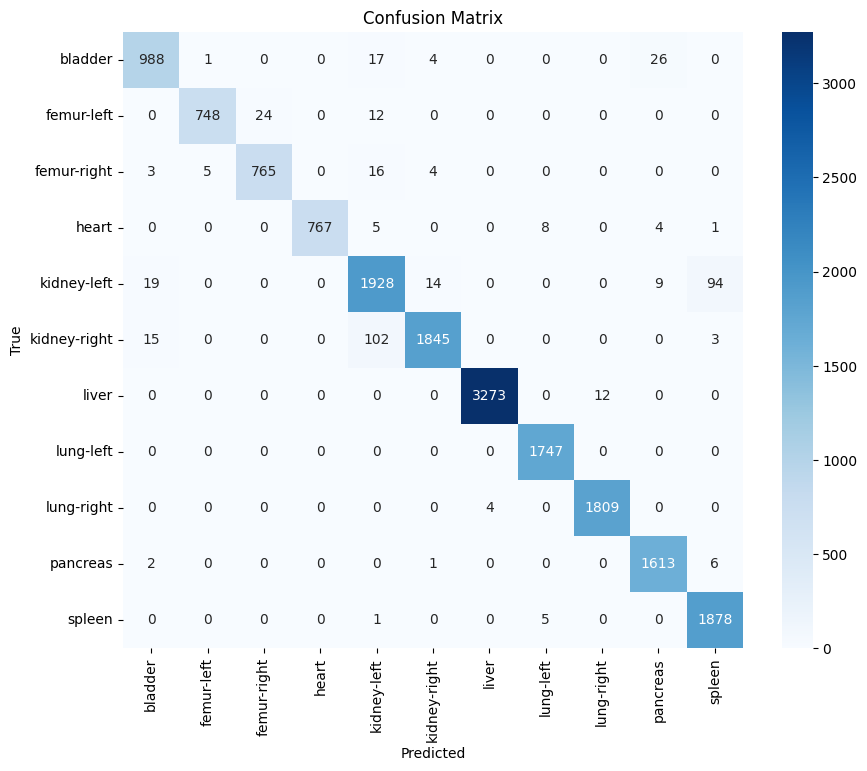

In [10]:
tr.evaluate_model(model=models, test_loader=test_loader, data_flag='organamnist')

In [11]:
for i, model in enumerate(models):
    tr.save_model(model, path=f'models/224x224/resnet18_organamnist224_{i}.pt')

Model saved to models/224x224/resnet18_organamnist224_0.pt
Model saved to models/224x224/resnet18_organamnist224_1.pt
Model saved to models/224x224/resnet18_organamnist224_2.pt
Model saved to models/224x224/resnet18_organamnist224_3.pt
Model saved to models/224x224/resnet18_organamnist224_4.pt
